In [1]:
import importlib
import numpy as np
import lernnavi_preprocess as pp
importlib.reload(pp)

rows = pp.load_mastery_array()
mastery_df_german, mastery_df_math = pp.get_mastery_dfs(rows)

---Starting data loading---
	-->Loading users...
		Users loaded
	-->Loading events...
		Events loaded
	-->Loading transactions...
		Transactions loaded
	-->Loading documents...
		Documents loaded
	-->Loading topics translated...
		Topics translated loaded
---Data loading finished!---
---Starting data loading---
	-->Loading users...
		Users loaded
	-->Loading events...
		Events loaded
	-->Loading transactions...
		Transactions loaded
	-->Loading documents...
		Documents loaded
	-->Loading topics translated...
		Topics translated loaded
---Data loading finished!---


Processing records:   0%|          | 0/1093791 [00:00<?, ?it/s]

In [2]:
import cluster
importlib.reload(cluster)

<module 'cluster' from '/Users/aybarsyazici/Documents/EPFL/ML_Behavioral/milestone-4-uclumasa/cluster.py'>

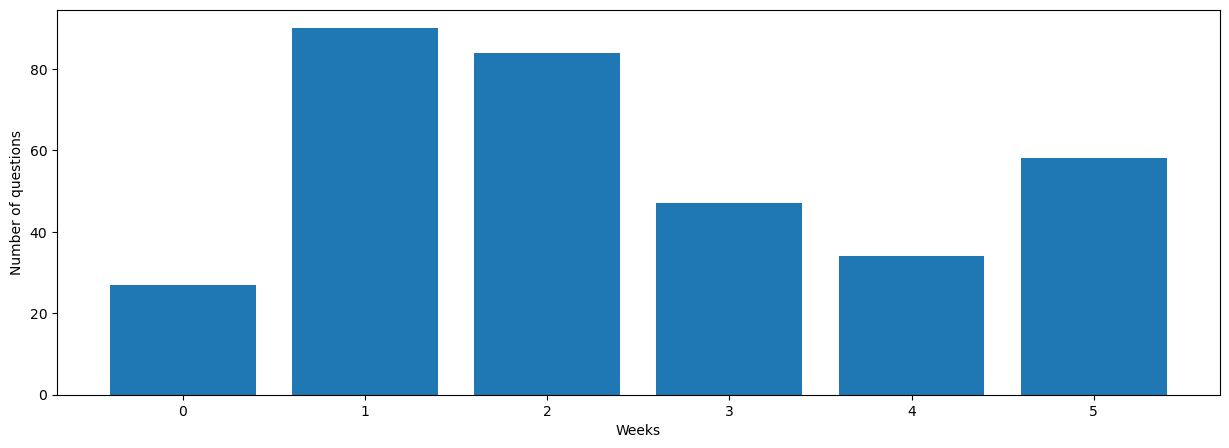

In [3]:
user_ids, data = cluster.prepare_data(mastery_df_german,6)
cluster.visualize_data(data[len(data)-1]) # We visualize one student's data

In [ ]:
print(data.shape)
print("__________________________")
data

In [17]:
user_ids

array([387604, 387643, 387644, ..., 429900, 429901, 429902])

## WARNING START
##      BELOW CELLS TAKE A REALLY LONG TIME TO RUN!!!!

In [ ]:
from tslearn.metrics import cdist_dtw
import matplotlib.pyplot as plt

windows = [1,2]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for window in windows:
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=1)
    for gamma in gammas:
        if gamma == 0: continue
        print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

In [ ]:
windows = [3,4]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in windows:
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=1)
    for gamma in gammas:
        if gamma == 0: continue
        print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

In [13]:
windows = [6]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in windows:
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=1)
    for gamma in gammas:
        if gamma == 0: continue
        print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

window:  6


## WARNING END

In [4]:
windows = [1,2,3,4,5,6]
D_for_window = {
    window: cluster.get_distance_matrix(data, metric='dtw', window=window) for window in windows
}

window:  1


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Group 0 has 140 students
Group 1 has 717 students
Group 2 has 167 students


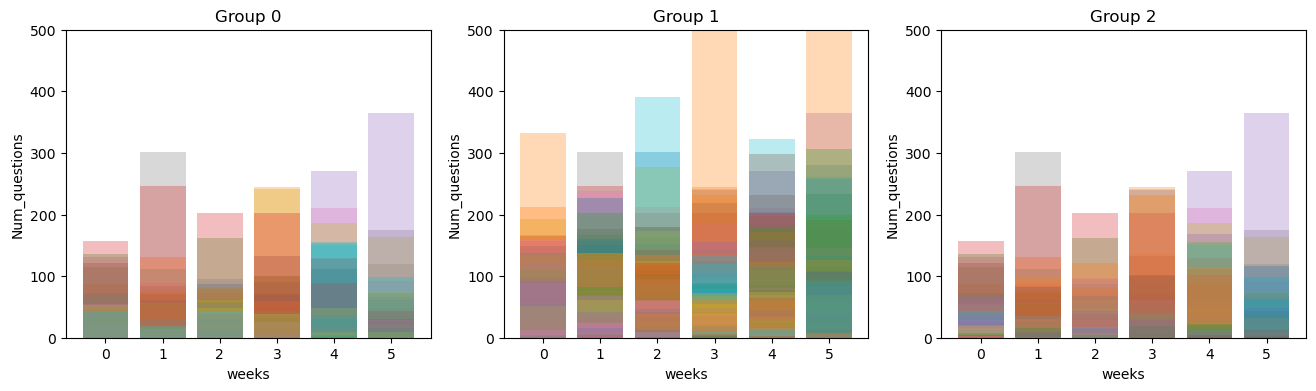

_________________________________________________________
window:  2


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Group 0 has 144 students
Group 1 has 709 students
Group 2 has 171 students


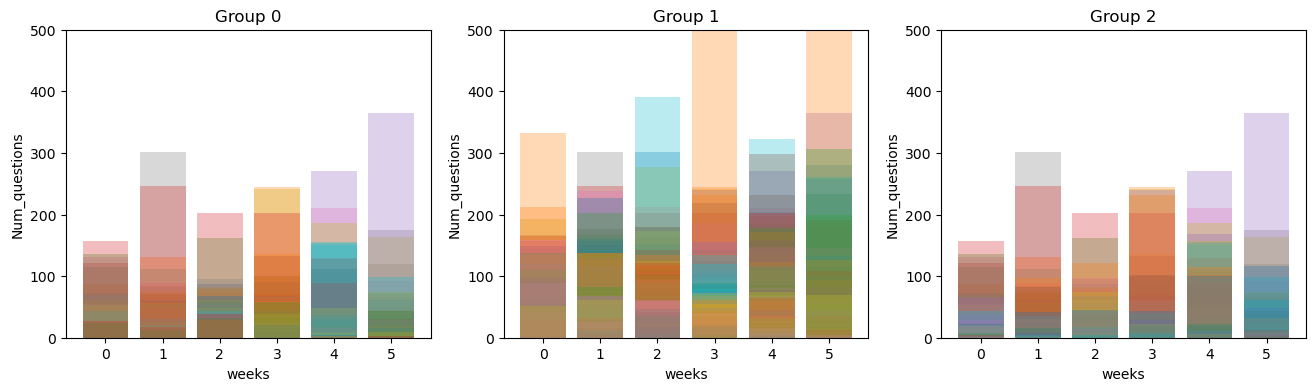

_________________________________________________________
window:  3


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Group 0 has 144 students
Group 1 has 709 students
Group 2 has 171 students


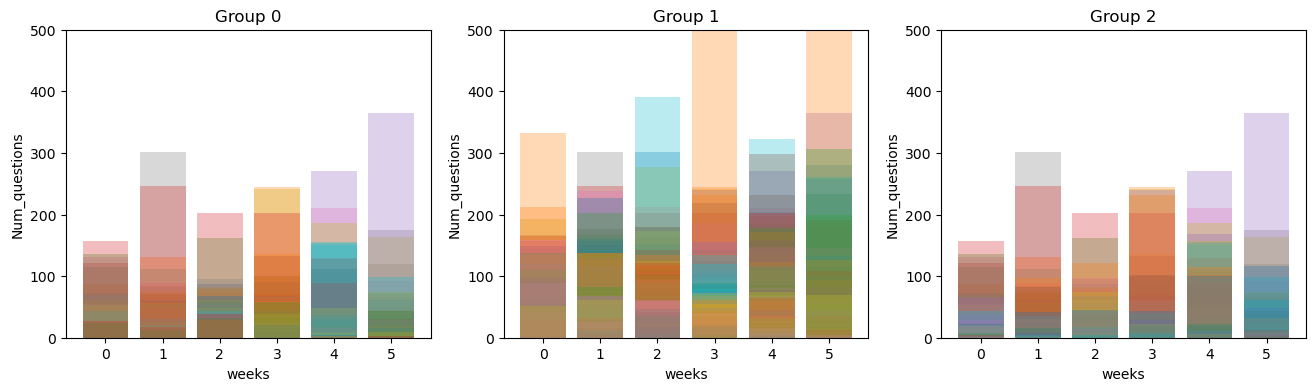

_________________________________________________________
window:  4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Group 0 has 144 students
Group 1 has 709 students
Group 2 has 171 students


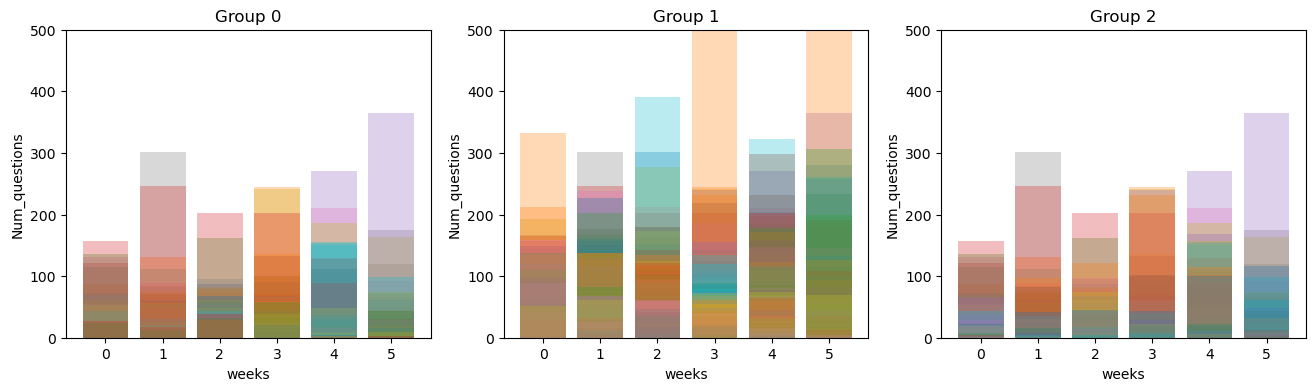

_________________________________________________________
window:  5


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Group 0 has 144 students
Group 1 has 709 students
Group 2 has 171 students


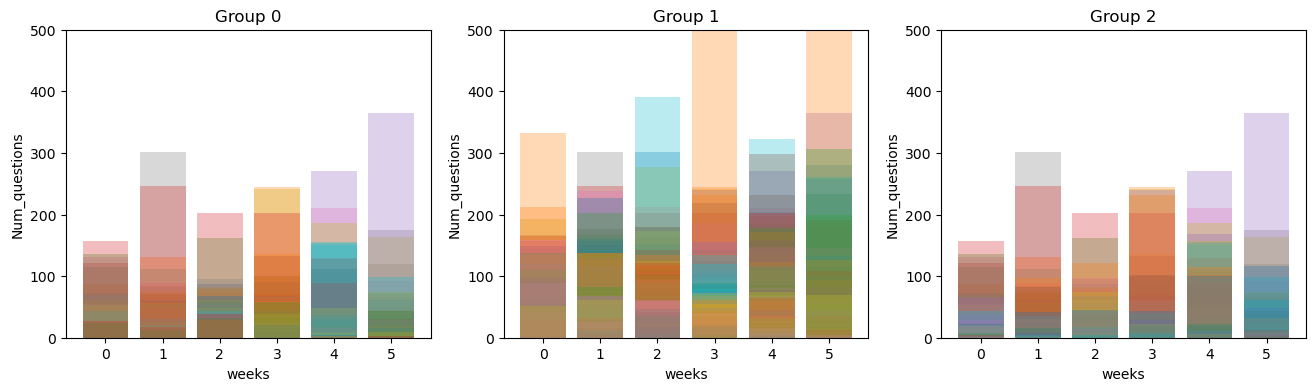

_________________________________________________________
window:  6


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Group 0 has 144 students
Group 1 has 709 students
Group 2 has 171 students


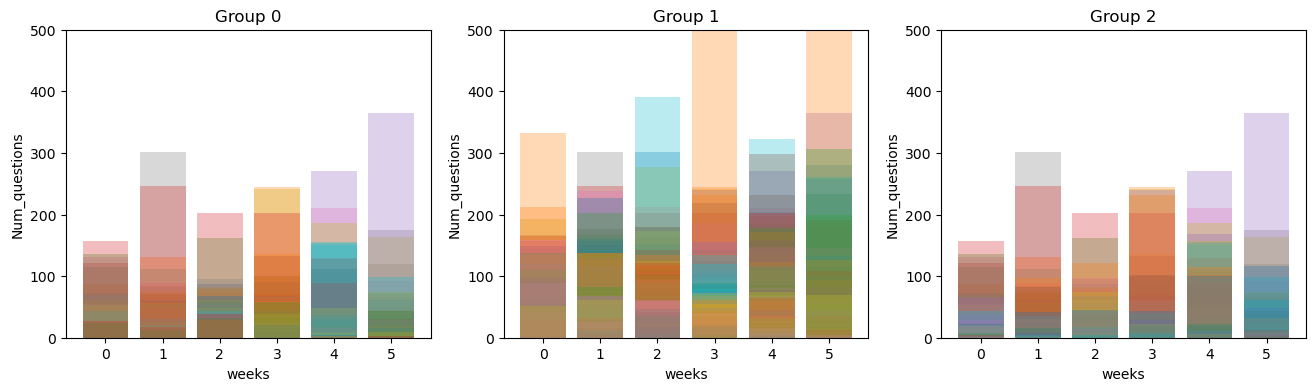

_________________________________________________________


In [5]:
# We fix gamma to be = 10 and try for all windows
gamma = 10
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(data, kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Group 0 has 259 students
Group 1 has 765 students


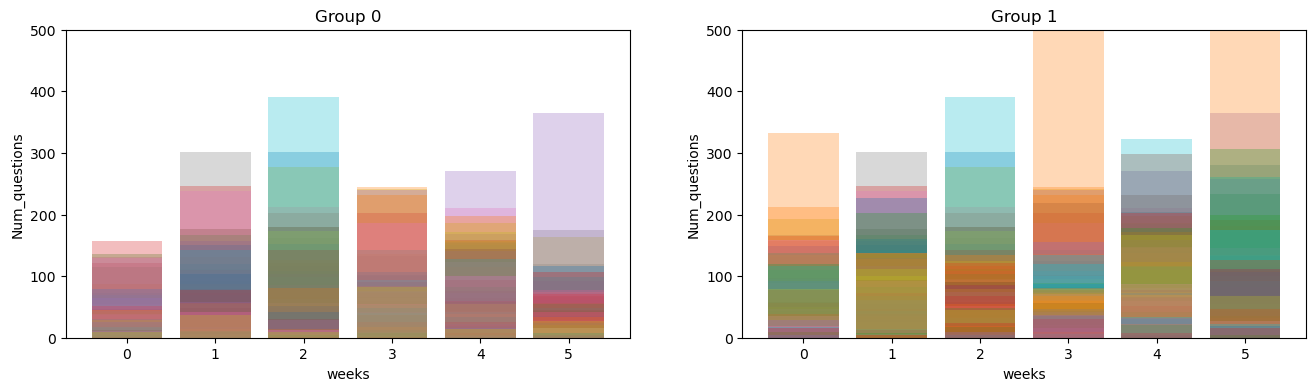

_________________________________________________________
window:  2
Group 0 has 761 students
Group 1 has 263 students


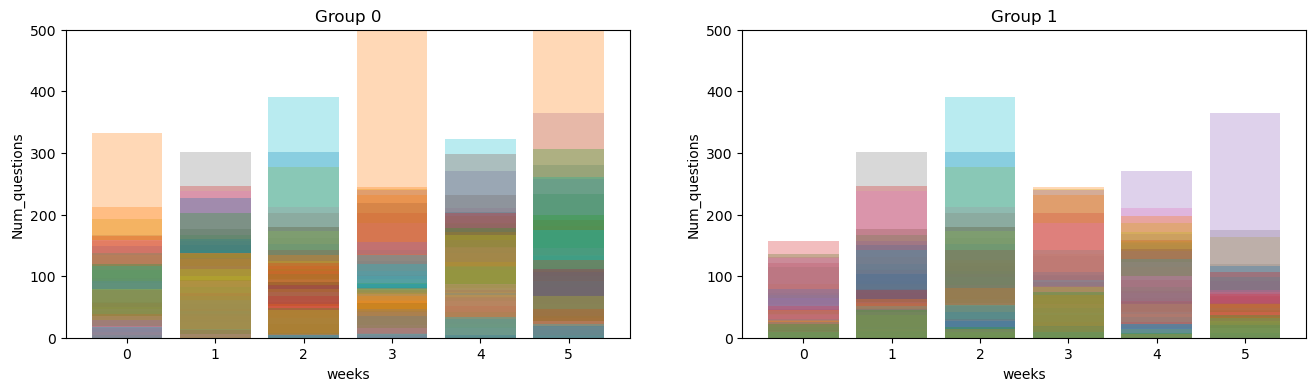

_________________________________________________________
window:  3
Group 0 has 817 students
Group 1 has 207 students


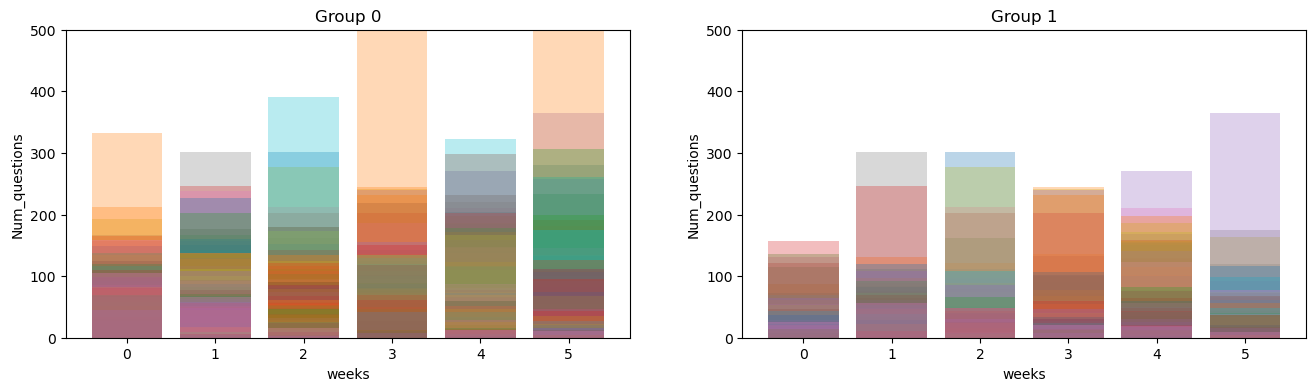

_________________________________________________________
window:  4
Group 0 has 818 students
Group 1 has 206 students


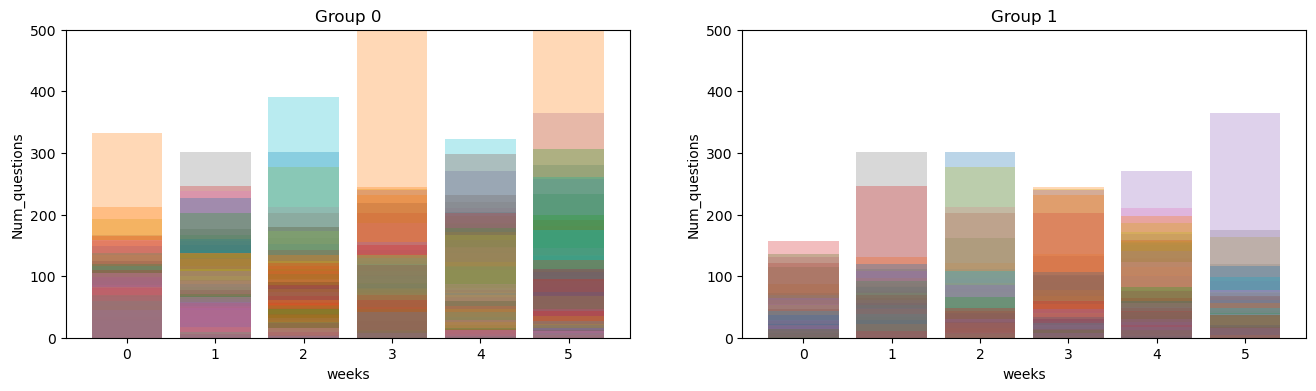

_________________________________________________________
window:  5
Group 0 has 818 students
Group 1 has 206 students


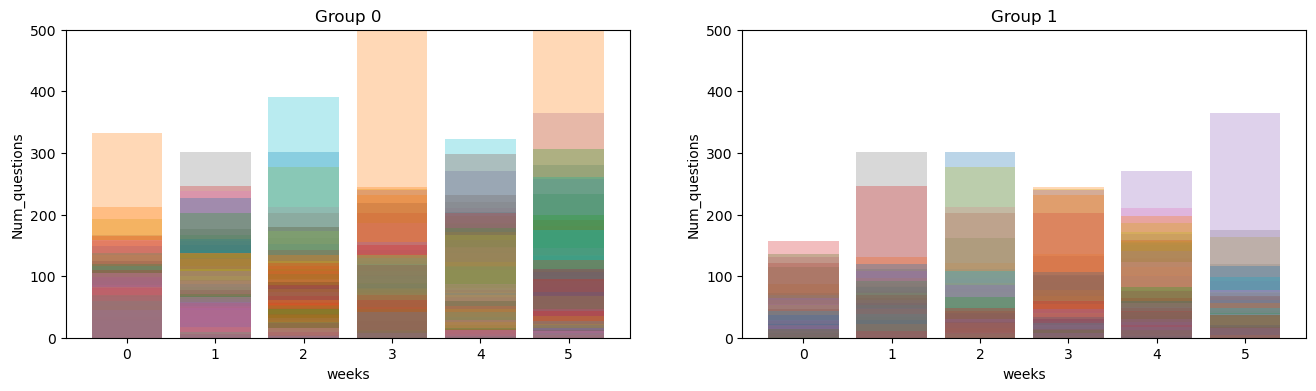

_________________________________________________________
window:  6
Group 0 has 818 students
Group 1 has 206 students


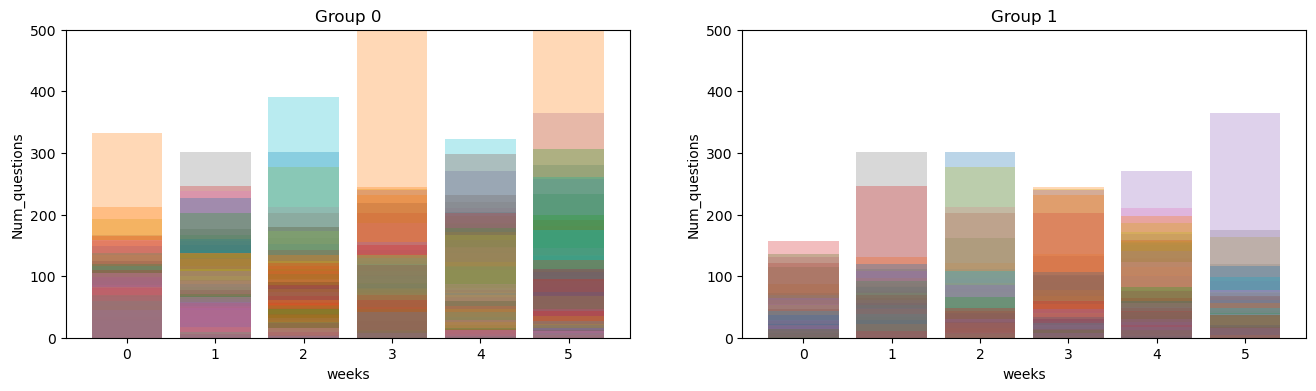

_________________________________________________________


In [6]:
# We select gamma = 1 and k = 2
gamma = 1
k = 2
for window in windows:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(data, kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Group 0 has 132 students
Group 1 has 733 students
Group 2 has 159 students


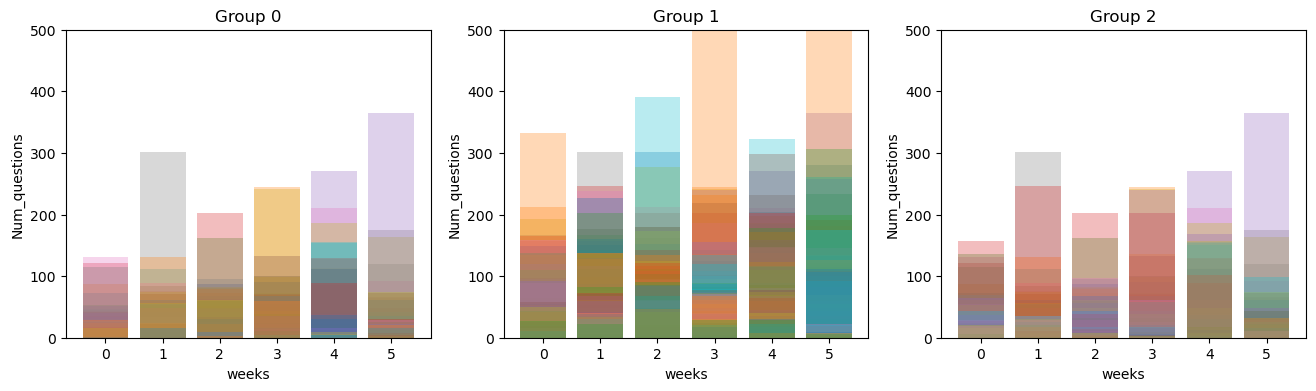

_________________________________________________________
window:  2
Group 0 has 143 students
Group 1 has 166 students
Group 2 has 715 students


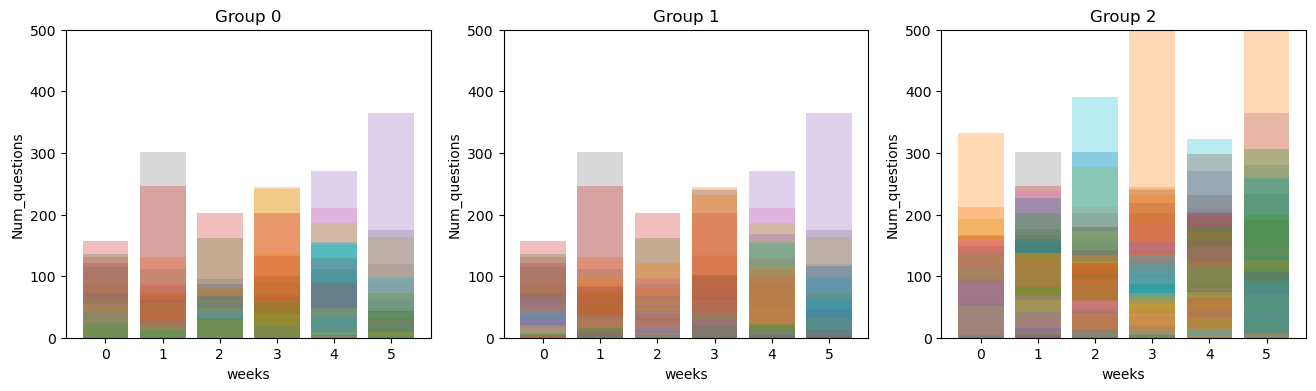

_________________________________________________________
window:  3
Group 0 has 143 students
Group 1 has 715 students
Group 2 has 166 students


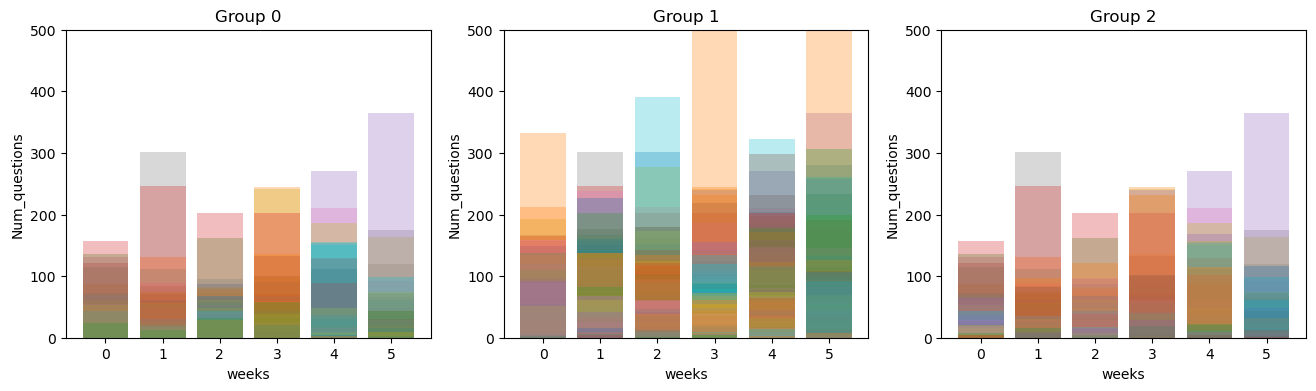

_________________________________________________________
window:  4
Group 0 has 143 students
Group 1 has 715 students
Group 2 has 166 students


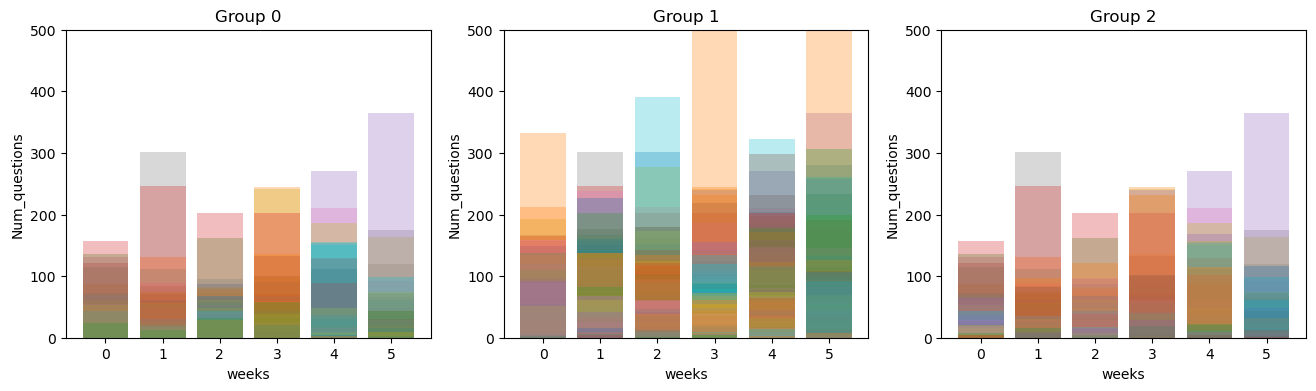

_________________________________________________________
window:  5
Group 0 has 143 students
Group 1 has 715 students
Group 2 has 166 students


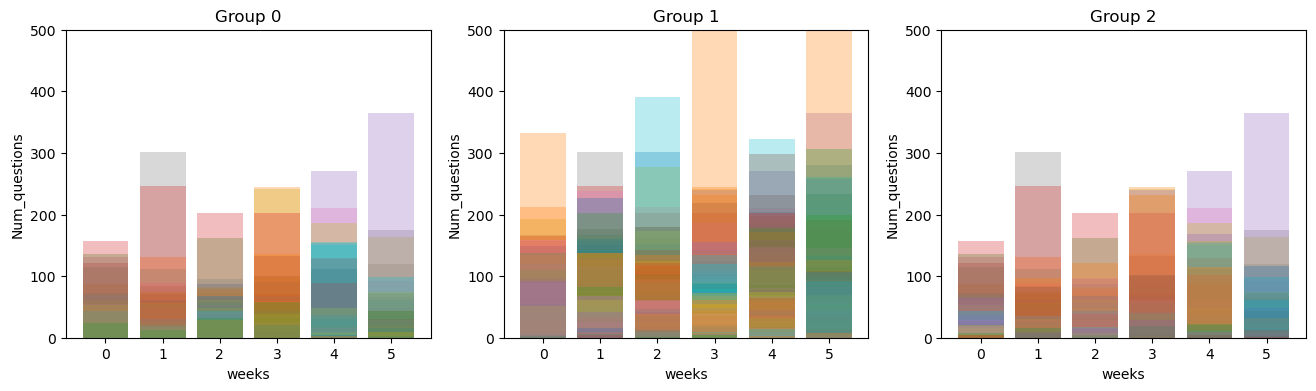

_________________________________________________________
window:  6
Group 0 has 143 students
Group 1 has 715 students
Group 2 has 166 students


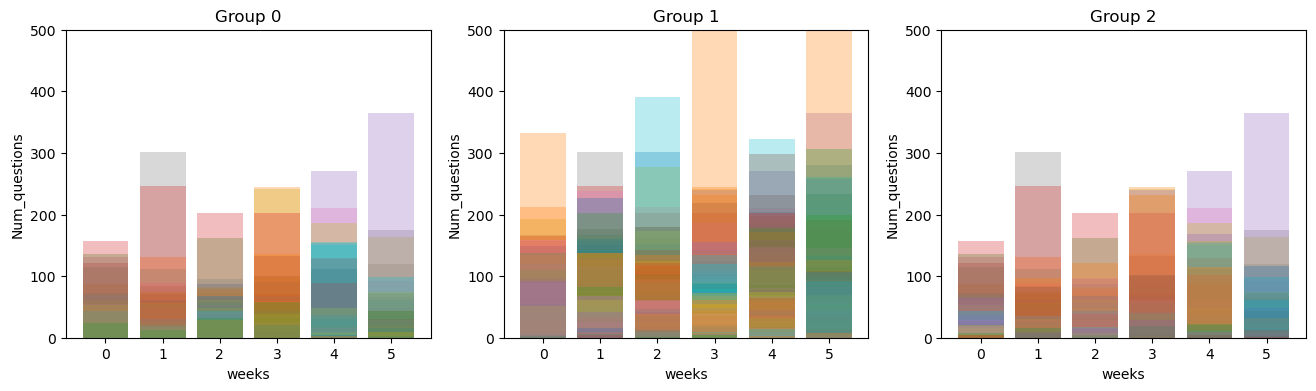

_________________________________________________________


In [8]:
# We select gamma = 30 and k = 3
gamma = 30
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(data, kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Group 0 has 183 students
Group 1 has 841 students


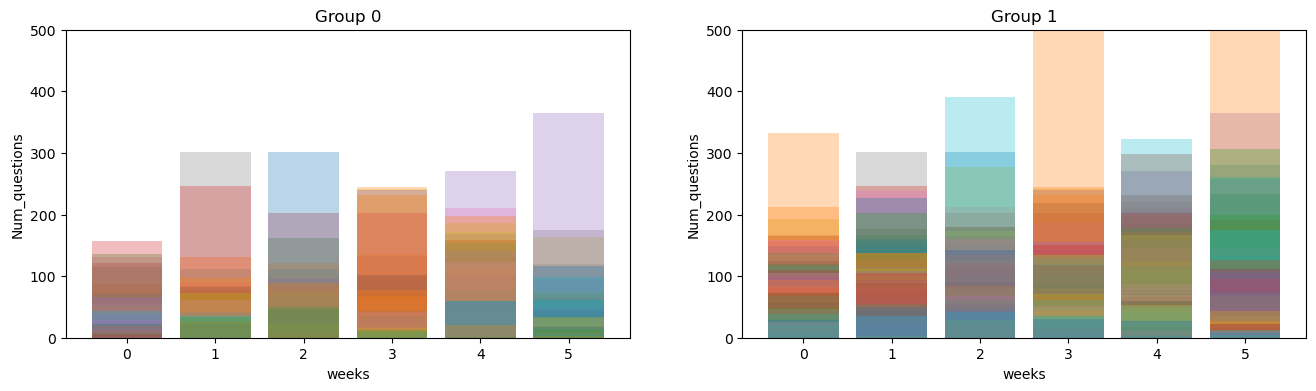

_________________________________________________________
window:  2
Group 0 has 830 students
Group 1 has 194 students


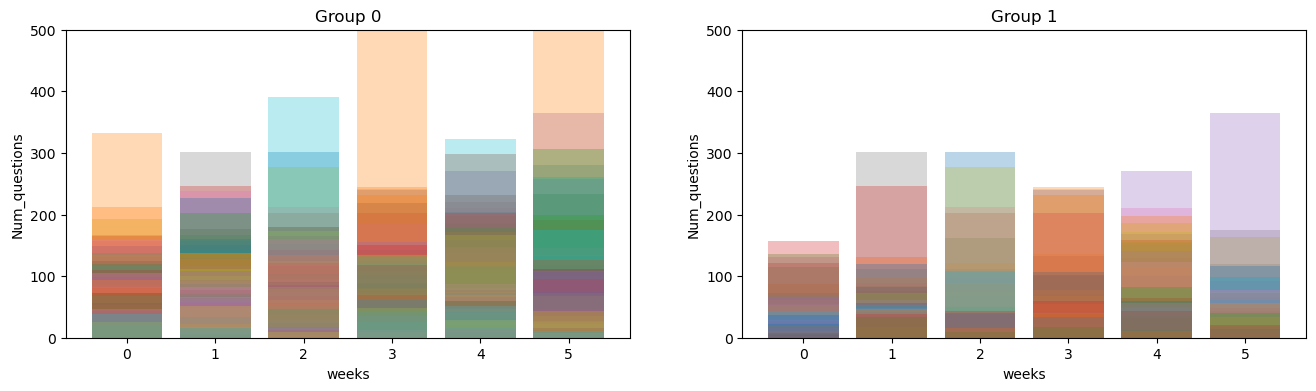

_________________________________________________________
window:  3
Group 0 has 830 students
Group 1 has 194 students


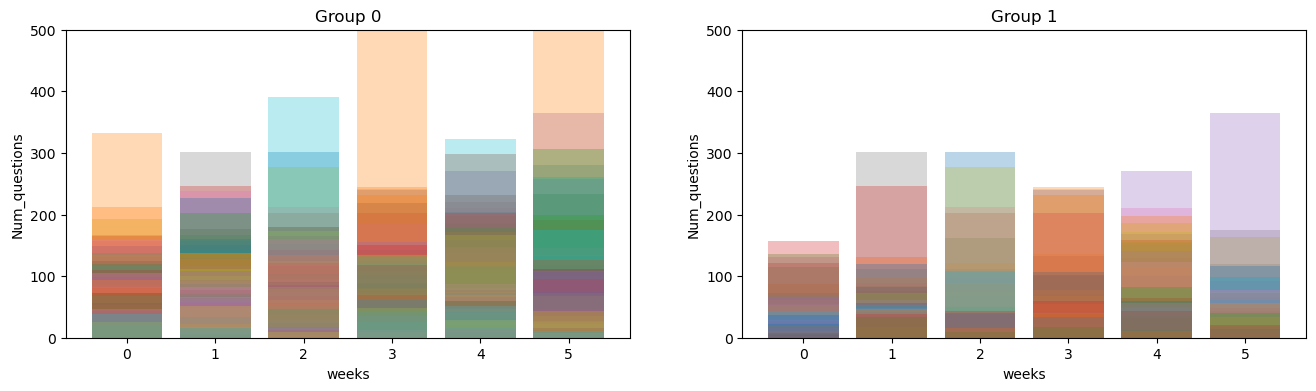

_________________________________________________________
window:  4
Group 0 has 830 students
Group 1 has 194 students


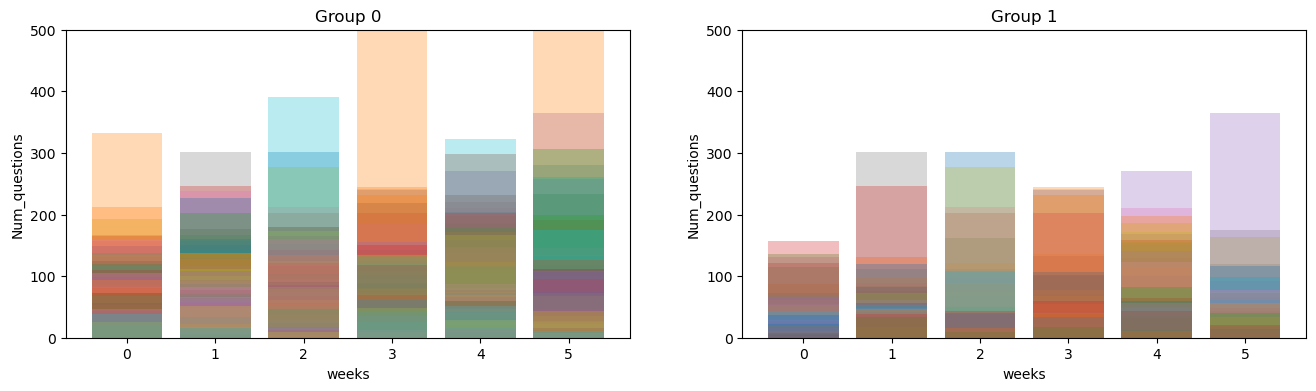

_________________________________________________________
window:  5
Group 0 has 830 students
Group 1 has 194 students


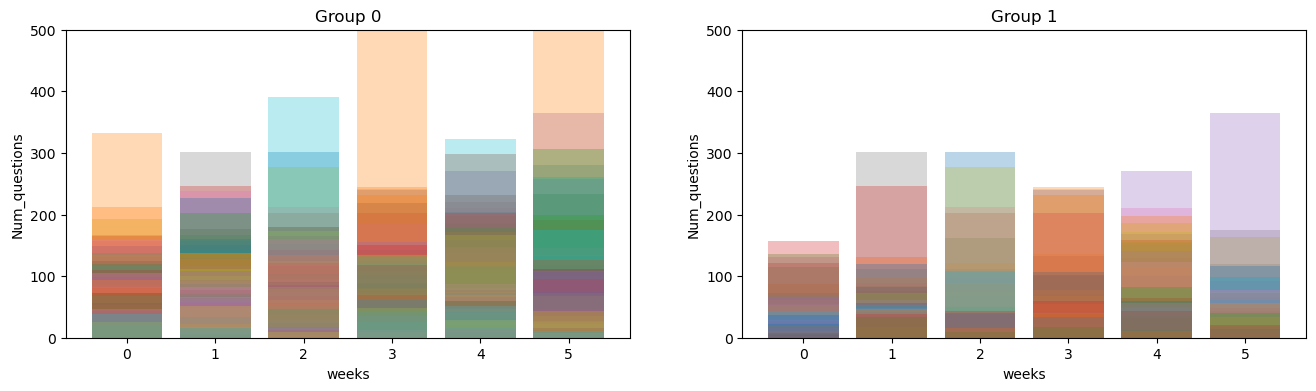

_________________________________________________________
window:  6
Group 0 has 830 students
Group 1 has 194 students


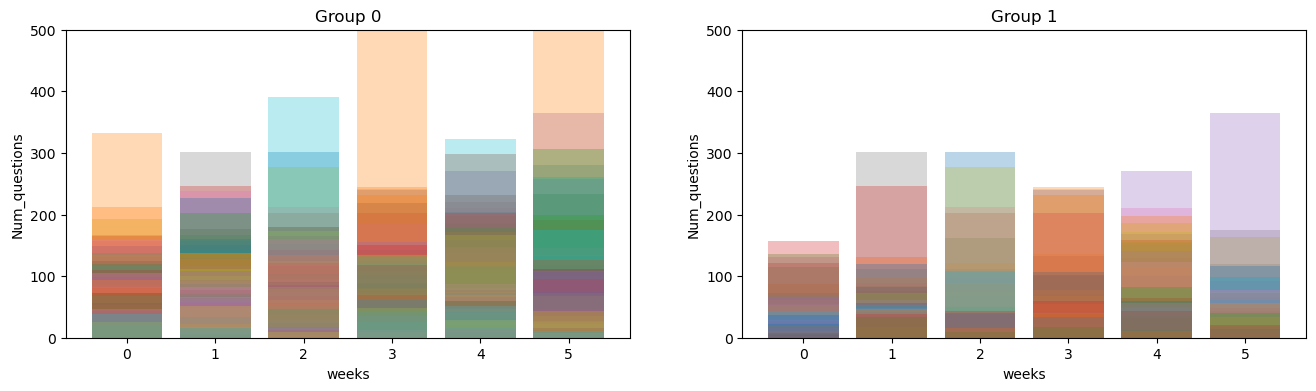

_________________________________________________________


In [9]:
# We select gamma = 1 and k = 2
gamma = 5
k = 2
for window in windows:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(data, kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Group 0 has 838 students
Group 1 has 186 students


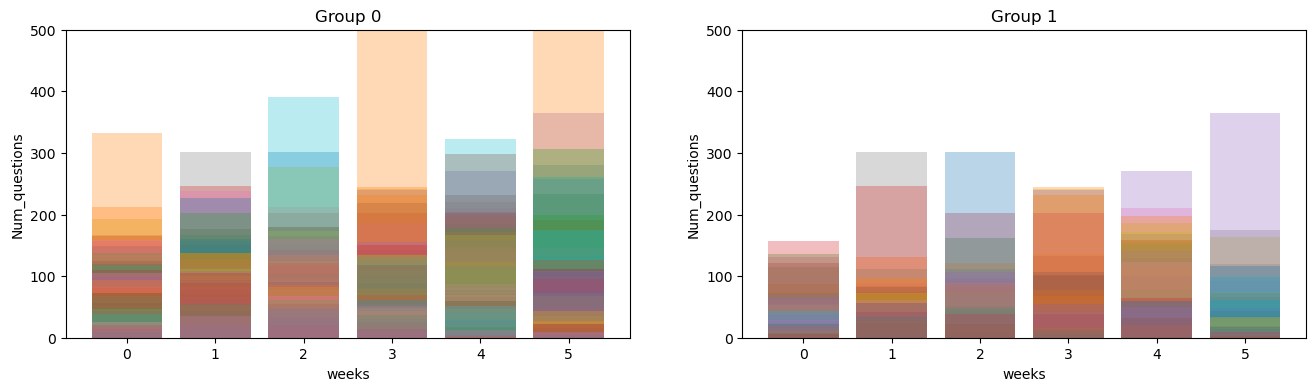

_________________________________________________________
window:  2
Group 0 has 851 students
Group 1 has 173 students


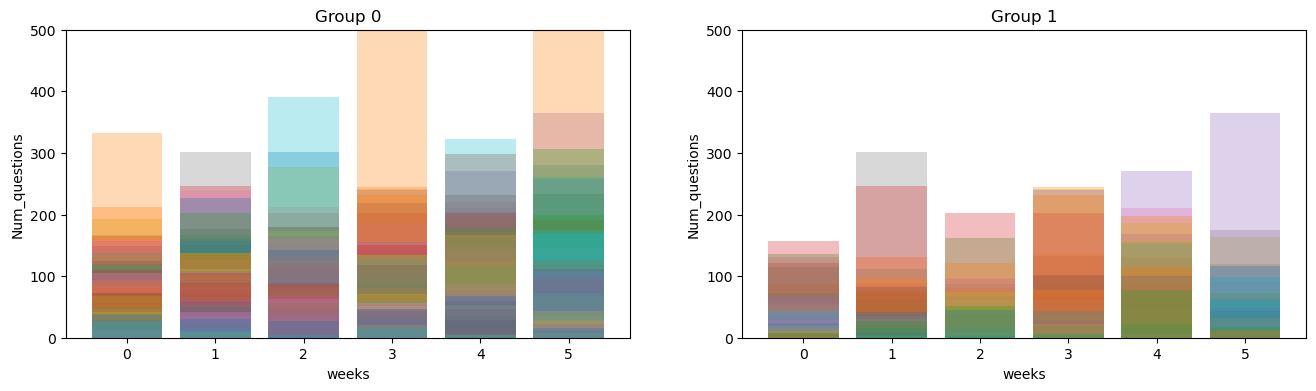

_________________________________________________________
window:  3
Group 0 has 853 students
Group 1 has 171 students


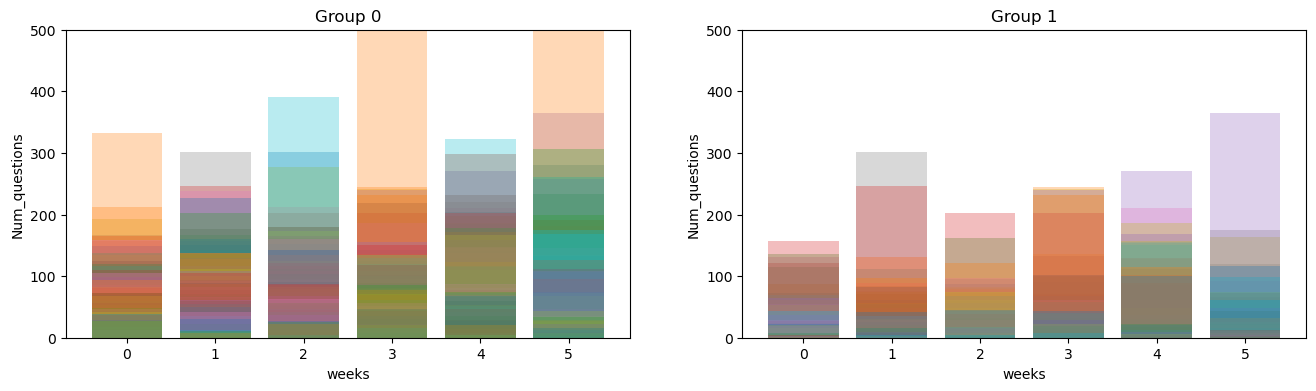

_________________________________________________________
window:  4
Group 0 has 853 students
Group 1 has 171 students


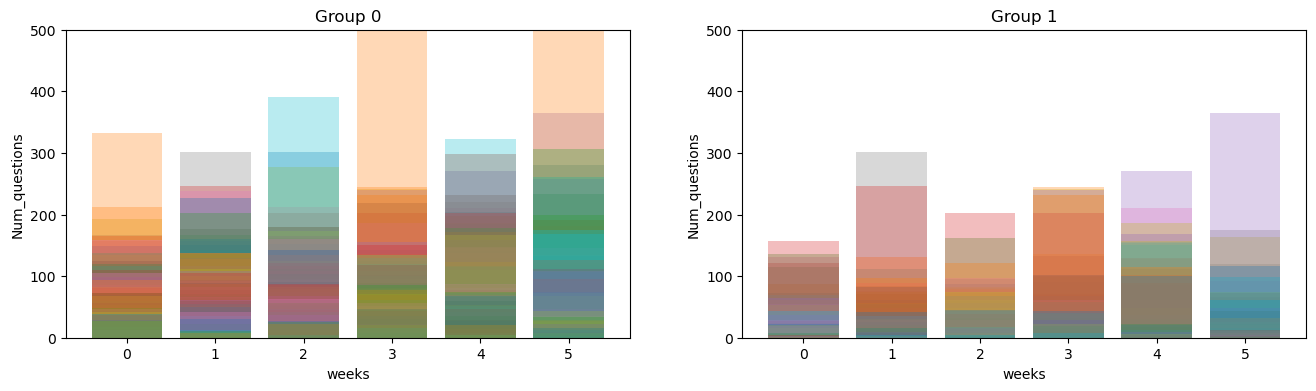

_________________________________________________________
window:  5
Group 0 has 853 students
Group 1 has 171 students


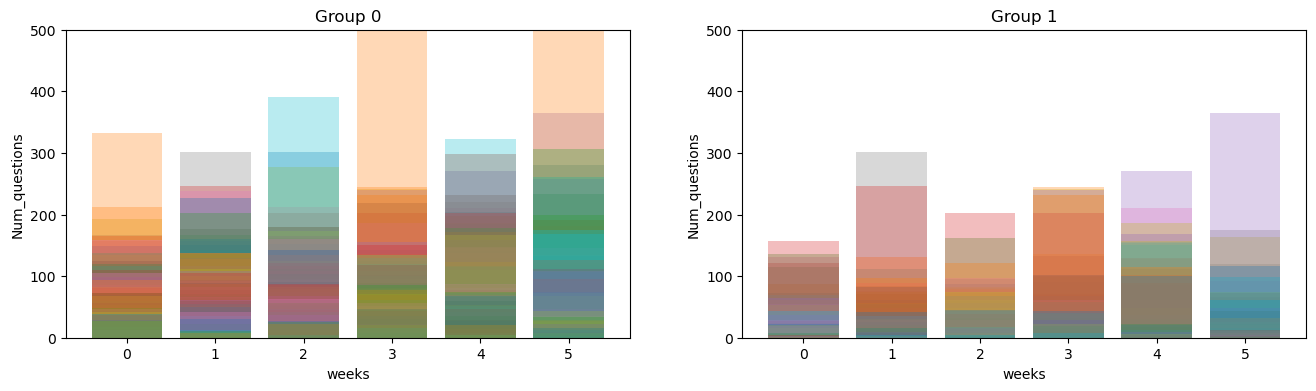

_________________________________________________________
window:  6
Group 0 has 853 students
Group 1 has 171 students


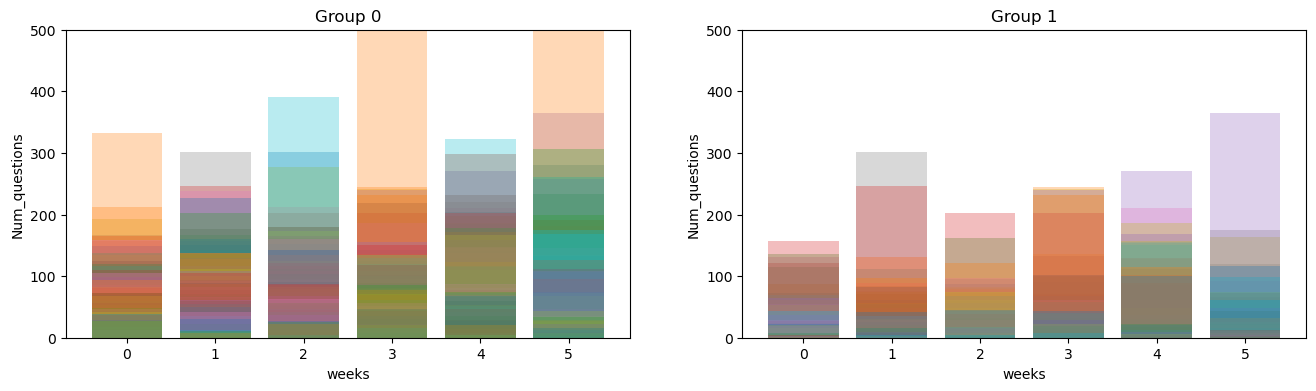

_________________________________________________________


In [10]:
# We select gamma = 1 and k = 2
gamma = 5
k = 2
for window in windows:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(data, kmeans.labels_, 6)
    print("_________________________________________________________")

window:  6
Group 0 has 625 students
Group 1 has 399 students


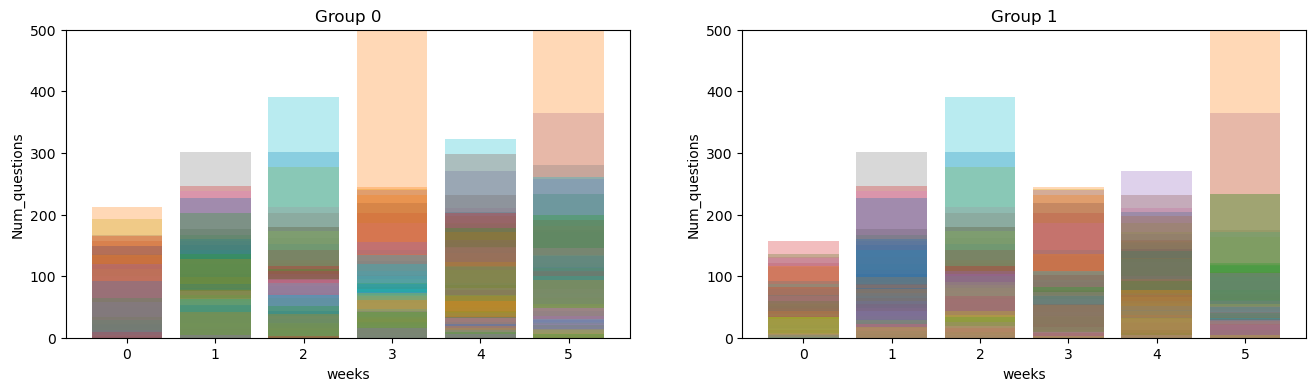

_________________________________________________________


In [11]:
# We select gamma = 1 and k = 2
gamma = 0.1
k = 2
for window in [6]:
    print("window: ", window)
    D = D_for_window[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(data, kmeans.labels_, 6)
    print("_________________________________________________________")